<a href="https://colab.research.google.com/github/hasuarez32/Proyecto_Final_Opti/blob/main/Proyecto_Final_Opti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo Sin optimizar**

Saving heart.csv to heart (3).csv
Primeras filas del dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Descripción del dataset:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
m

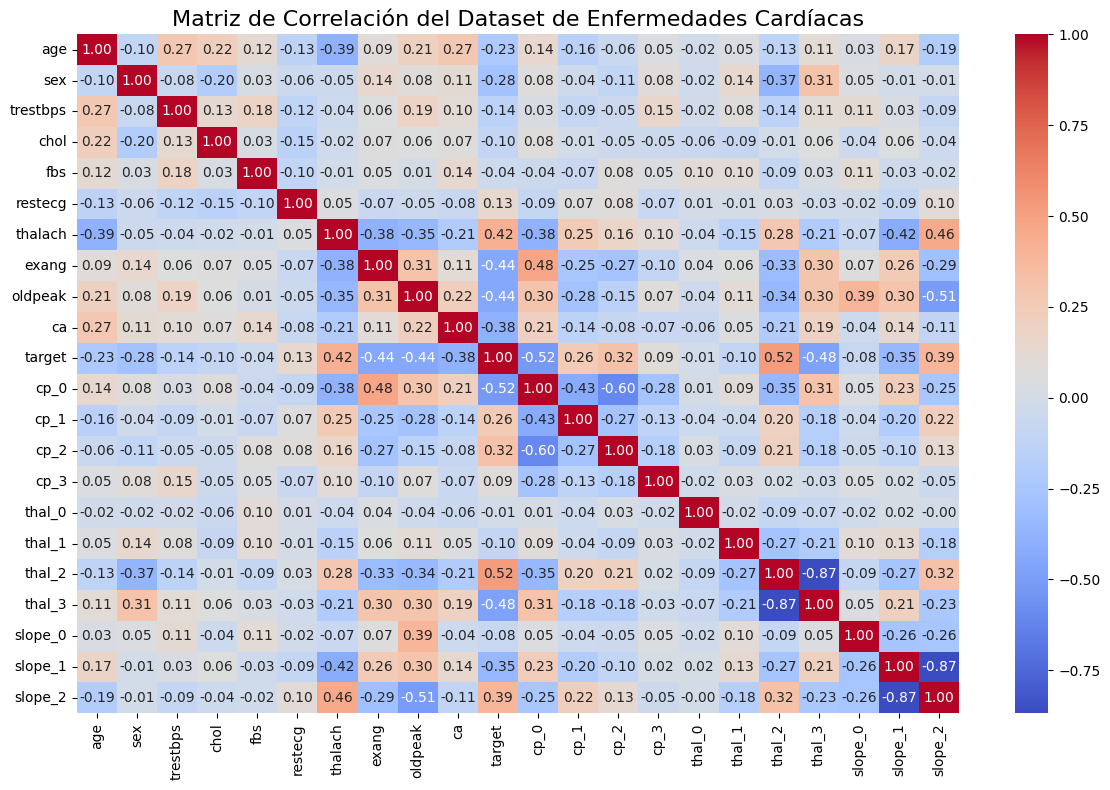


Tamaños de los conjuntos:
Conjunto de entrenamiento: (820, 21)
Conjunto de prueba: (205, 21)

Entrenando el modelo Random Forest...
Entrenamiento completado.

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Matriz de Confusión:
[[102   0]
 [  3 100]]

AUC-ROC: 1.00


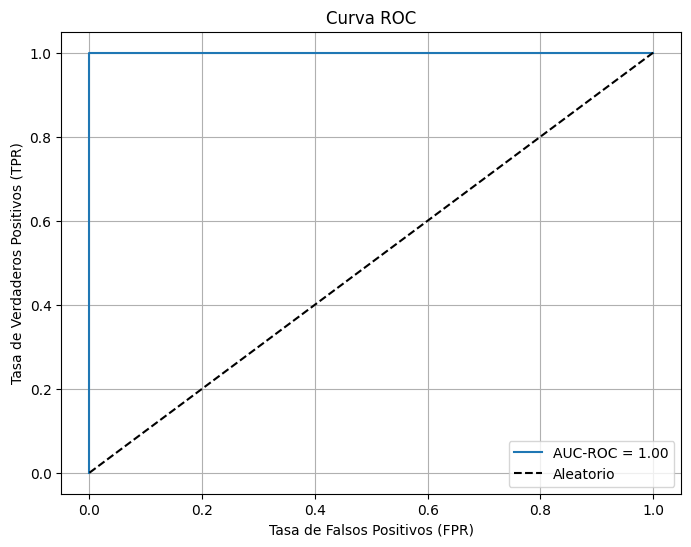

In [4]:
from google.colab import files
uploaded = files.upload(heart.csv)

import pandas as pd

# Cargar el archivo en un DataFrame
data = pd.read_csv('heart.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Cargar el dataset
data = pd.read_csv('heart.csv')

# Revisión inicial del dataset
print("Primeras filas del dataset:")
print(data.head())
print("\nDescripción del dataset:")
print(data.describe())
print("\nRevisión de valores nulos:")
print(data.isnull().sum())

# Manejo de valores nulos (si existieran)
data = data.dropna()

# Escalado de datos (normalización)
scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# Codificación de variables categóricas
data = pd.get_dummies(data, columns=['cp', 'thal', 'slope'])

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(
    data.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={"size": 10}
)
plt.title("Matriz de Correlación del Dataset de Enfermedades Cardíacas", fontsize=16)
plt.tight_layout()
plt.show()

# División en conjuntos de entrenamiento y prueba
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificación final
print("\nTamaños de los conjuntos:")
print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)

# Implementación del modelo Random Forest
print("\nEntrenando el modelo Random Forest...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("Entrenamiento completado.")

# Predicciones
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Evaluación del modelo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Calcular AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC-ROC: {roc_auc:.2f}")

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# **Modelo Optimizado**

Primeras filas del dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Descripción del dataset:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000    

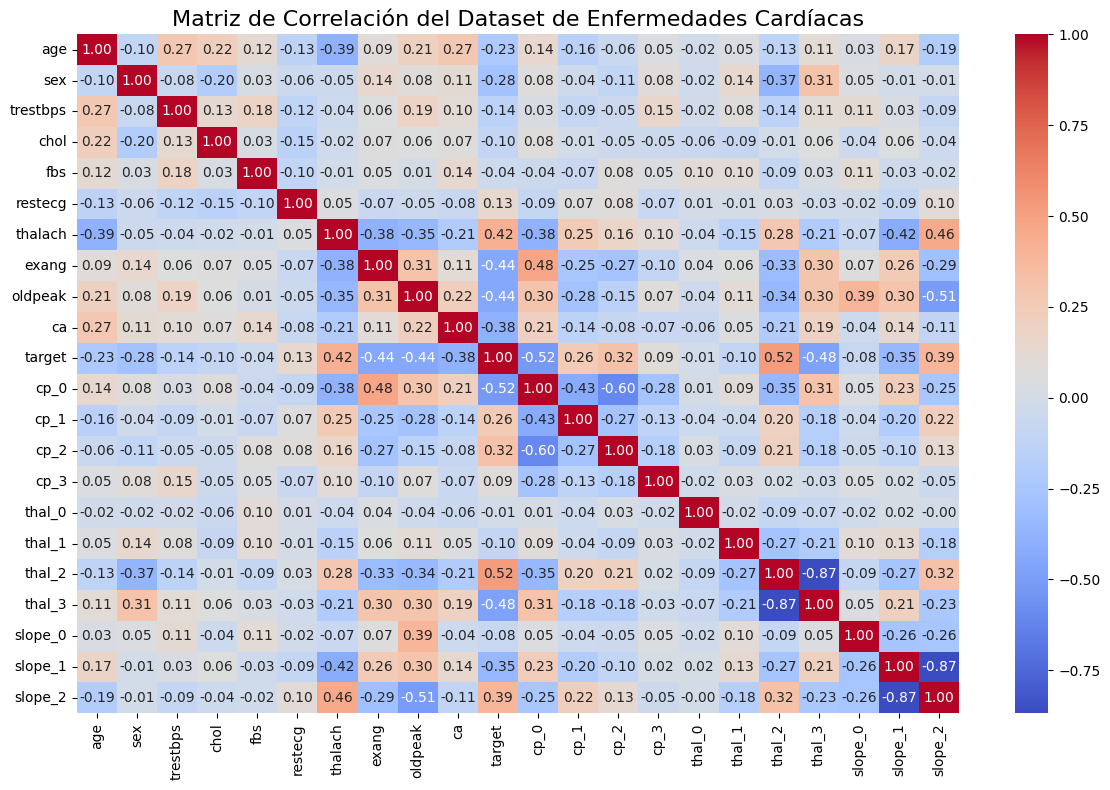


Tamaños de los conjuntos:
Conjunto de entrenamiento: (820, 21)
Conjunto de prueba: (205, 21)

Iniciando la búsqueda de hiperparámetros con Grid Search...
Fitting 5 folds for each of 144 candidates, totalling 720 fits

Optimización completada.

Mejores hiperparámetros encontrados:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Reporte de Clasificación del Mejor Modelo:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Matriz de Confusión del Mejor Modelo:
[[102   0]
 [  3 100]]


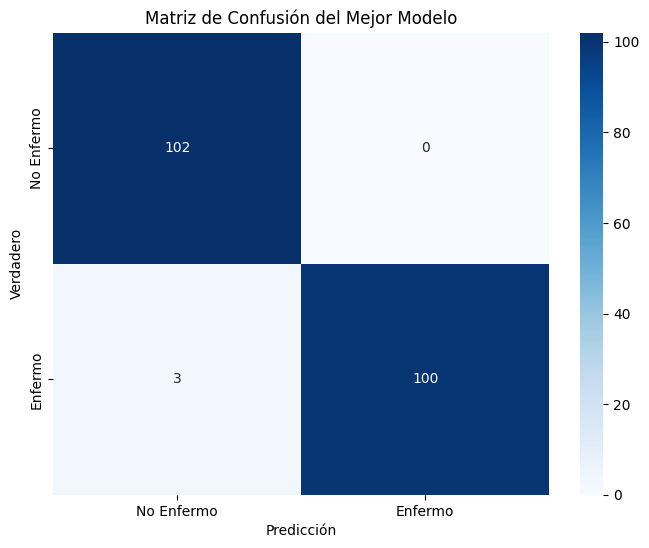


AUC-ROC del Mejor Modelo: 1.00


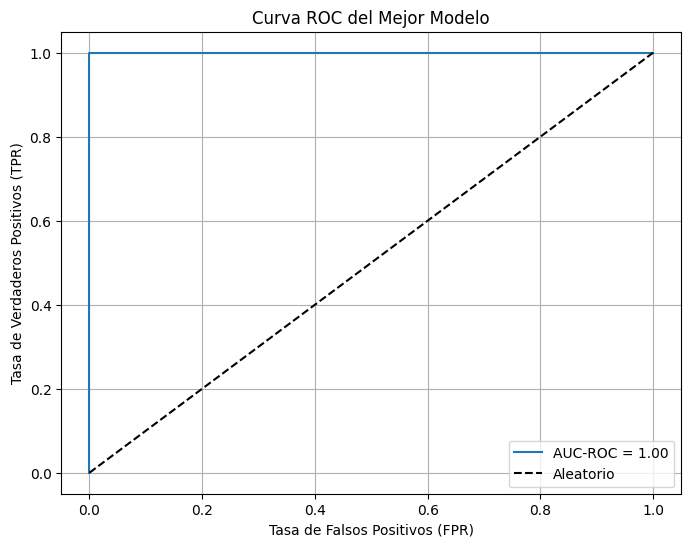

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Cargar el dataset
data = pd.read_csv('heart.csv')

# Revisión inicial del dataset
print("Primeras filas del dataset:")
print(data.head())
print("\nDescripción del dataset:")
print(data.describe())
print("\nRevisión de valores nulos:")
print(data.isnull().sum())

# Manejo de valores nulos (si existieran)
data = data.dropna()

# Escalado de datos (normalización)
scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# Codificación de variables categóricas
data = pd.get_dummies(data, columns=['cp', 'thal', 'slope'])

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(
    data.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={"size": 10}
)
plt.title("Matriz de Correlación del Dataset de Enfermedades Cardíacas", fontsize=16)
plt.tight_layout()
plt.show()

# División en conjuntos de entrenamiento y prueba
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificación final
print("\nTamaños de los conjuntos:")
print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)

# Implementación del modelo Random Forest con Grid Search
print("\nIniciando la búsqueda de hiperparámetros con Grid Search...")

# Definir el modelo base
rf_model = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Configurar Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # Validación cruzada de 5 pliegues
    scoring='accuracy',  # Métrica a optimizar
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2  # Mostrar progreso
)

# Ejecutar Grid Search
grid_search.fit(X_train, y_train)
print("\nOptimización completada.")

# Resultados del mejor modelo
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Reporte de clasificación del mejor modelo
print("\nReporte de Clasificación del Mejor Modelo:")
print(classification_report(y_test, y_pred))

# Matriz de confusión del mejor modelo
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión del Mejor Modelo:")
print(conf_matrix)

# Gráfico de Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Enfermo", "Enfermo"], yticklabels=["No Enfermo", "Enfermo"])
plt.title("Matriz de Confusión del Mejor Modelo")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

# Calcular AUC-ROC para el mejor modelo
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC-ROC del Mejor Modelo: {roc_auc:.2f}")

# Graficar la curva ROC del mejor modelo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Mejor Modelo')
plt.legend(loc='lower right')
plt.grid()
plt.show()


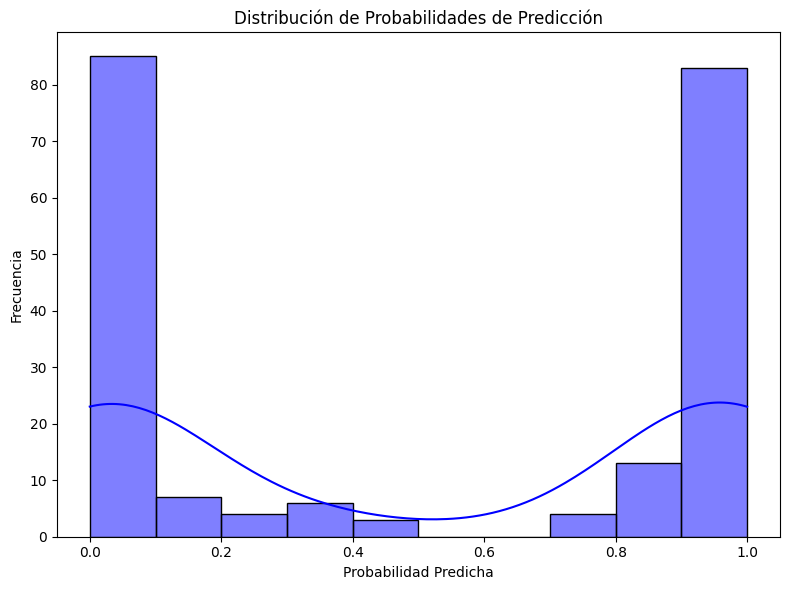

In [6]:
# Código para distribución de probabilidades predichas (ya incluido en el bloque anterior)
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, kde=True, bins=10, color="blue")
plt.title("Distribución de Probabilidades de Predicción")
plt.xlabel("Probabilidad Predicha")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


<ipython-input-8-c3a294579dd3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


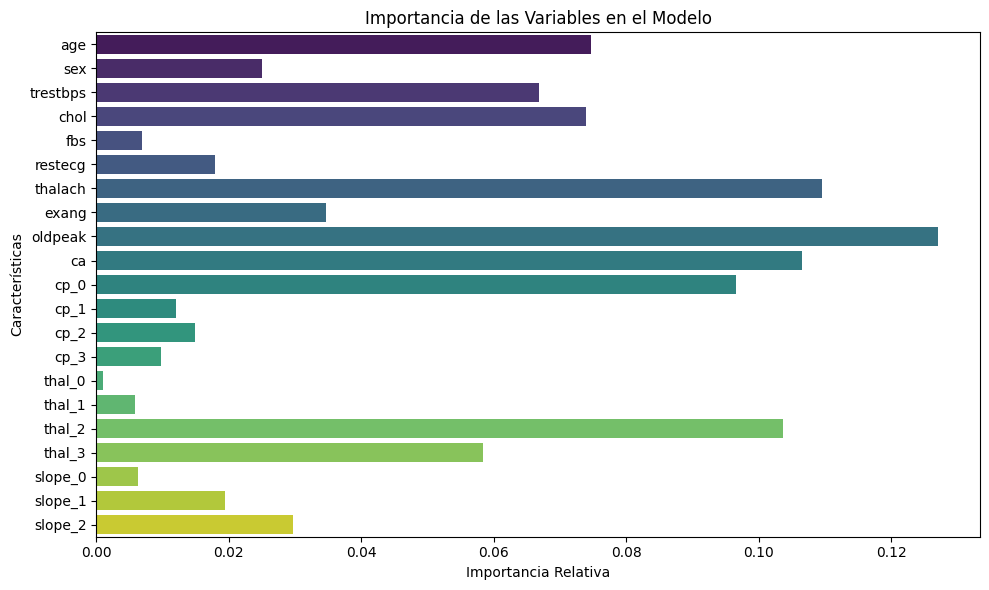

In [8]:
# Obtener la importancia de las variables del modelo
importances = best_model.feature_importances_  # Asegúrate de que 'best_model' está entrenado
features = X_train.columns  # Los nombres de las características del dataset

# Crear el gráfico de importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Importancia de las Variables en el Modelo")
plt.xlabel("Importancia Relativa")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


Saving heart.csv to heart (1).csv


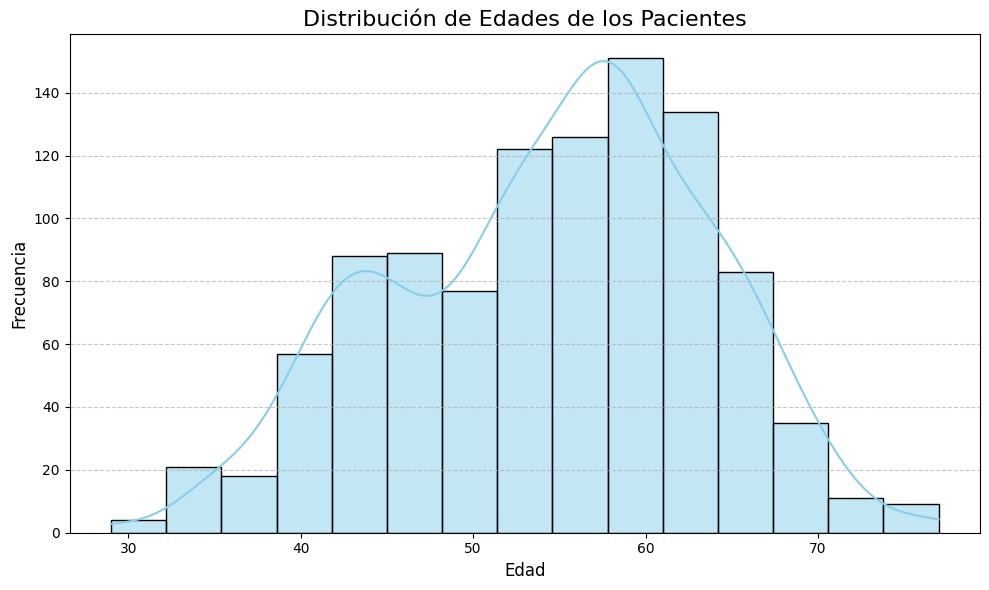

In [6]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir el archivo CSV
uploaded = files.upload()

# Cargar el dataset
data = pd.read_csv('heart.csv')

# Crear la gráfica de distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=15, kde=True, color="skyblue")
plt.title('Distribución de Edades de los Pacientes', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar la gráfica como imagen
plt.savefig('grafica_de_edad.png', dpi=300)
plt.show()
